# ML assigment 4 - Implementation of least-square classification in matrix notation

1. Assume you have three classes. The data points for the one class are sampled from the Gaussian distribution with the mean1 [0,4], for the second class with the mean2 [3,3] and finally for the third class with the mean3 [5,1], the covariance matrix [[0.3, 0.2], [0.2, 0.2]] is the same for all three distributions.Create 1000 sample for each class and visualize them.

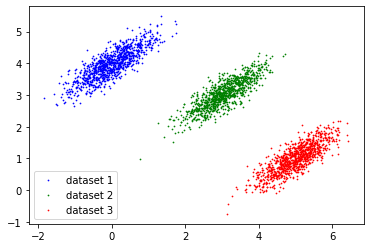

In [11]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import time
import os
import pandas as pd

cov_mat = np.array([[0.3, 0.2],[0.2, 0.2]])

# dataset - 1
mean1 = np.array([0, 4])
# class1 = np.zeros(mean1.shape)
class1 = np.random.multivariate_normal(mean1, cov_mat, size=1000)

# dataset - 2
mean2 = np.array([3, 3])
# class2 = np.zeros(mean2.shape)
class2 = np.random.multivariate_normal(mean2, cov_mat, size=1000)

#dataset - 3
# dataset - 2
mean3 = np.array([5, 1])
# class3 = np.zeros(mean3.shape)
class3 = np.random.multivariate_normal(mean3, cov_mat, size=1000)

x = class1[:,0]
y = class1[:,1]
x1 = class2[:,0]
y1 = class2[:,1]
x2 = class3[:,0]
y2 = class3[:,1]
plt.scatter(x,y, 0.5, color='blue', label='dataset 1')
plt.scatter(x1,y1, 0.5, color='green', label='dataset 2')
plt.scatter(x2,y2, 0.5, color='red', label='dataset 3')
plt.legend()
plt.show()

In [12]:
data1 = class1
data2 = class2 
data3 = class3

def dataset_formation(data1, data2, data3, n):
    if n == 2:
        data1_2 = np.hstack((data1,data2))
        return data1_2
    
    elif n == 3:
        data1_2_3 = np.hstack((data1,data2,data3))
        return data1_2_3
    
testdata_2c = dataset_formation(data1, data2, data3, 2)
#print(testdata_2c)
testdata_3c = dataset_formation(data1, data2, data3, 3)
#print(testdata_3c)

# Create 1000 sample for each class and visualize them.

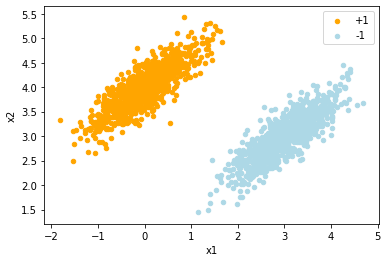

In [5]:
# Create Pandas DataFrame for holding binary class data.
df = pd.DataFrame(testdata_2c, columns=['x', 'y', 'x1', 'x2'])

# Create scatter plot of data points in both classes.
class_ax = df.plot.scatter(x='x', y='y', color='Orange', label='+1');
df.plot.scatter(x='x1', y='x2', color='LightBlue', label='-1', ax=class_ax);

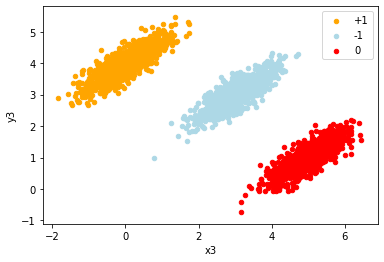

In [26]:
# Create Pandas DataFrame for holding binary class data.
df2 = pd.DataFrame(testdata_3c, columns=['x1', 'y1', 'x2', 'y2','x3','y3'])

# Create scatter plot of data points in both classes.
new_ax = df2.plot.scatter(x='x1', y='y1', color='Orange', label='+1');

df2.plot.scatter(x='x2', y='y2', color='LightBlue', label='-1', ax=new_ax);
df2.plot.scatter(x='x3', y='y3', color='red', label='0', ax=new_ax);

# Implement least-square classification in matrix notation.

# The error function  RSS(β)  measures the extent to which a given decision boundary  XTβ  misclassifies the points of our data set.

In [7]:
# Create complete data array comprised
# of all points from both classes.

def beta_for_datasets(class1,class2,class3,n):
    if n == 2:
        X = np.vstack((class1, class2))
        m = len(X)
        # Add column of ones to account for bias term
        X = np.array([np.ones(m), X[:, 0], X[:, 1]]).T
        # Create y array of class labels
        c1, c2 = np.ones(len(class1)), -np.ones(len(class2))
        target = np.concatenate((c1,c2))
        target_2c = np.expand_dims(target, 1)
        y = target_2c
        #  Calculate the Regularized Least Squares solution
        beta = np.linalg.inv(X.T @ X) @ (X.T @ y)
        rss = np.sum((y - X @ beta) ** 2)
        return beta,rss
    elif n == 3: 
        X1 = np.vstack((class1, class2, class3))
        m1 = len(X1)
        X1 = np.array([np.ones(m1), X1[:, 0], X1[:, 1]]).T
        c1, c2 ,c3 = np.ones(len(class1)), np.zeros(len(class3)), -np.ones(len(class2))
        target1 = np.concatenate((c1,c2,c3))
        target_3c = np.expand_dims(target1, 1)
        y1 = target_3c
        #  Calculate the Regularized Least Squares solution
        beta1 = np.linalg.inv(X1.T @ X1) @ (X1.T @ y1)
        rss1 = np.sum((y1 - X1 @ beta1) ** 2)
        return beta1,rss1
    
beta,rss = beta_for_datasets(class1,class2,class3,2)
print(beta)
print("The minimum RSS error is: " + str(rss))
#the error function  RSS(β)  measures the extent to which a given decision boundary  XTβ 
#misclassifies the points of our data set.

beta1,rss1 = beta_for_datasets(class1,class2,class3,3)
print(beta1)
print("The minimum RSS error is: " + str(rss1))



[[-1.19472849]
 [-0.47010982]
 [ 0.54388461]]
The minimum RSS error is: 44.18294473766035
[[-0.09582434]
 [-0.23393218]
 [ 0.27073202]]
The minimum RSS error is: 16.346552014742116


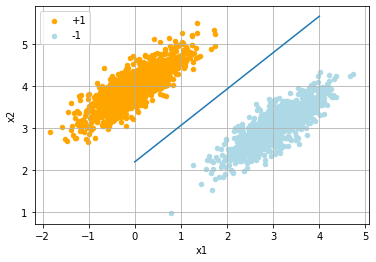

In [24]:
# Create Pandas DataFrame for holding binary class data.
df1 = pd.DataFrame(testdata_2c, columns=['x', 'y', 'x1', 'x2'])

# Create scatter plot of data points in both classes.
new_ax = df1.plot.scatter(x='x', y='y', color='Orange', label='+1');
df1.plot.scatter(x='x1', y='x2', color='LightBlue', label='-1', ax=new_ax);

# Plot the resulting regression line
line_x = np.linspace(0, 4)
line_y = -beta[0] / beta[2] - (beta[1] / beta[2]) * line_x

new_ax.plot(line_x, line_y)
plt.grid()
plt.show()

[[-0.09582434]
 [-0.23393218]
 [ 0.27073202]]


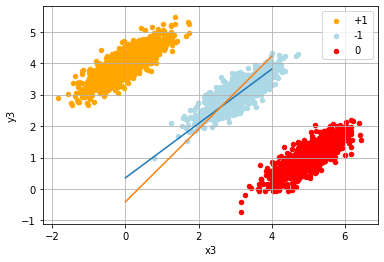

In [23]:
# Create Pandas DataFrame for holding binary class data.
df2 = pd.DataFrame(testdata_3c, columns=['x1', 'y1', 'x2', 'y2','x3','y3'])

# Create scatter plot of data points in both classes.
new_ax = df2.plot.scatter(x='x1', y='y1', color='Orange', label='+1');
df2.plot.scatter(x='x2', y='y2', color='LightBlue', label='-1', ax=new_ax);
df2.plot.scatter(x='x3', y='y3', color='red', label='0', ax=new_ax);

# Plot the resulting regression line
print(beta1)
line_x1 = np.linspace(0, 4)
line_y1 = -beta1[0] / beta1[2] - (beta1[1] / beta1[2]) * line_x1
line_y2 = -beta1[0] / beta1[1] - (beta1[2] / beta1[1]) * line_x1

new_ax.plot(line_x1, line_y1)
new_ax.plot(line_x1, line_y2)
plt.grid()
plt.show()

# Effect of outliers on two datasets

[[-0.32023285]
 [-0.52606232]
 [ 0.32561659]]
[[ 0.06058419]
 [-0.25726987]
 [ 0.23389462]]


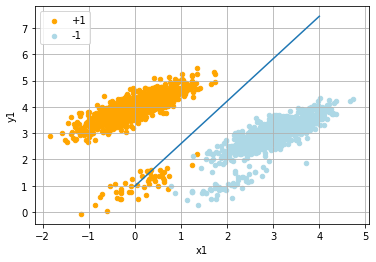

In [20]:
mean1_n = np.array([0, 1])
class1_o = np.random.multivariate_normal(mean1_n, cov_mat, size=50)
#print(class1_o)

mean2_n = np.array([2, 1])
class2_o = np.random.multivariate_normal(mean2_n, cov_mat, size=50)
#print(class2_o)

mean3_n = np.array([2, 2])
class3_o = np.random.multivariate_normal(mean3_n, cov_mat, size=50)
#print(class3_o)

class1_outlier = np.vstack((class1,class1_o))
class2_outlier = np.vstack((class2,class2_o))
class3_outlier = np.vstack((class3,class3_o))
#print(class3_outlier)

    
beta_o,rss_o = beta_for_datasets(class1_outlier,class2_outlier,class3_outlier,2)
print(beta_o)
beta_o1,rss_o1 = beta_for_datasets(class1_outlier,class2_outlier,class3_outlier,3)
print(beta_o1)

testdata_2c_outliers = np.hstack((class1_outlier,class2_outlier))
testdata_3c_outliers = np.hstack((class1_outlier,class2_outlier,class3_outlier))

df1_o = pd.DataFrame(testdata_2c_outliers, columns=['x', 'y', 'x1', 'y1'])
df2_0 = pd.DataFrame(testdata_3c_outliers, columns=['x', 'y', 'x1', 'y1','x2','y2'])

# # Create scatter plot of data points in both classes.
new_ax = df1_o.plot.scatter(x='x', y='y', color='Orange', label='+1');
df1_o.plot.scatter(x='x1', y='y1', color='LightBlue', label='-1', ax=new_ax);

# # Plot the resulting regression line
line_x = np.linspace(0, 4)
line_y = -beta_o[0] / beta_o[2] - (beta_o[1] / beta_o[2]) * line_x

new_ax.plot(line_x, line_y)
plt.grid()
plt.show()


# Effect of outliers on three datasets

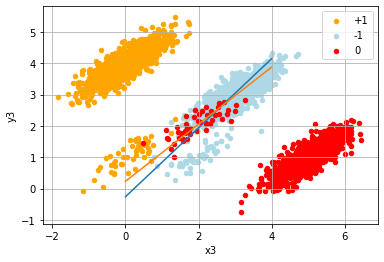

In [21]:
# Create Pandas DataFrame for holding binary class data.
df2_o = pd.DataFrame(testdata_3c_outliers, columns=['x1', 'y1', 'x2', 'y2','x3','y3'])

# Create scatter plot of data points in both classes.
new_ax = df2_o.plot.scatter(x='x1', y='y1', color='Orange', label='+1');
df2_o.plot.scatter(x='x2', y='y2', color='LightBlue', label='-1', ax=new_ax);
df2_o.plot.scatter(x='x3', y='y3', color='red', label='0', ax=new_ax);


# # Plot the resulting regression line
line_x1 = np.linspace(0, 4)
line_y1 = -beta_o1[0] / beta_o1[2] - (beta_o1[1] / beta_o1[2]) * line_x1
line_y2 = -beta_o1[0] / beta_o1[1] - (beta_o1[2] / beta_o1[1]) * line_x1

new_ax.plot(line_x1, line_y1)
new_ax.plot(line_x1, line_y2)
plt.grid()
plt.show()

Authors:
    
Shravanthi Arvind Patil

Sreenivasa Hikkal Venugopala